**Name - SIDDHIKA RAKSHE**

**Class - IS2**

**Roll Number - 2173199**

**Enrollment Number - MITU17BTCS0168**


#**TITLE : CV - TUT 5**

#**TUT SHEET 5**



#**AIM**

1.	Implement Dimensionality Reduction approach i.e. PCA (Principal Component Analysis). Take five principal components into consideration.

#**OBJECTIVE**

1. To learn about dimensionality reduction techniques
2. To implement principle component analysis




# **THEORY**


# **1. What is curse of dimensionality?**

The curse of dimensionality refers to the phenomena that occur when classifying, organizing, and analyzing high dimensional data that does not occur in low dimensional spaces, specifically the issue of data sparsity and “closeness” of data.

![alt text](https://www.google.com/search?q=curse+of+dimensionality&hl=en&sxsrf=ALeKk00EnFulIC_woOA5hzmpUR1MdLzCbg:1606298913186&source=lnms&tbm=isch&sa=X&ved=2ahUKEwj-lf7guZ3tAhWPzDgGHdFeDAYQ_AUoAXoECA4QAw&biw=1536&bih=666#imgrc=xjgdJ3NCztVniM)

issues-
Sparsity of data occurs when moving to higher dimensions. the volume of the space represented grows so quickly that the data cannot keep up and thus becomes sparse, as seen below.  The sparsity issue is a major one for anyone whose goal has some statistical significance.
As the data space seen above moves from one dimension to two dimensions and finally to three dimensions, the given data fills less and less of the data space.  In order to maintain an accurate representation of the space, the data for analysis grows exponentially.


The second issue that arises is related to sorting or classifying the data.  In low dimensional spaces, data may seem very similar but the higher the dimension the further these data points may seem to be.  The two wind turbines below seem very close to each other in two dimensions but separate when viewed in a third dimension.  This is the same effect the curse of dimensionality has on data.
#**2. Linear Discriminant Analysis**

**Linear Discriminant Analysis** or **Normal Discriminant Analysis** or **Discriminant Function Analysis** is a dimensionality reduction technique which is commonly used for the supervised classification problems. It is used for modeling differences in groups i.e. separating two or more classes. It is used to project the features in higher dimension space into a lower dimension space.

For example, we have two classes and we need to separate them efficiently. Classes can have multiple features. Using only a single feature to classify them may result in some overlapping as shown in the below figure. So, we will keep on increasing the number of features for proper classification.



Two criteria are used by LDA to create a new axis:

1. Maximize the distance between means of the two classes.

2. Minimize the variation within each class.


---
#**3. PCA**

**Principal Component Analysis (PCA)** 
Principal Component Analysis (PCA) is the main linear approach for dimensionality reduction. It performs a linear mapping of the data from a higher-dimensional space to a lower-dimensional space in such a manner that the variance of the data in the low-dimensional representation is maximized

It involves the following steps:

1. Construct the covariance matrix of the data.

2. Compute the eigenvectors of this matrix.

3. Eigenvectors corresponding to the largest eigenvalues are used to reconstruct a large fraction of variance of the original data.

Hence, we are left with a lesser number of eigenvectors, and there might have been some data loss in the process. But, the most important variances should be retained by the remaining eigenvectors.

![alt text](https://upload.wikimedia.org/wikipedia/commons/f/f5/GaussianScatterPCA.svg)

---
#**4. Difference between LDA and PCA**

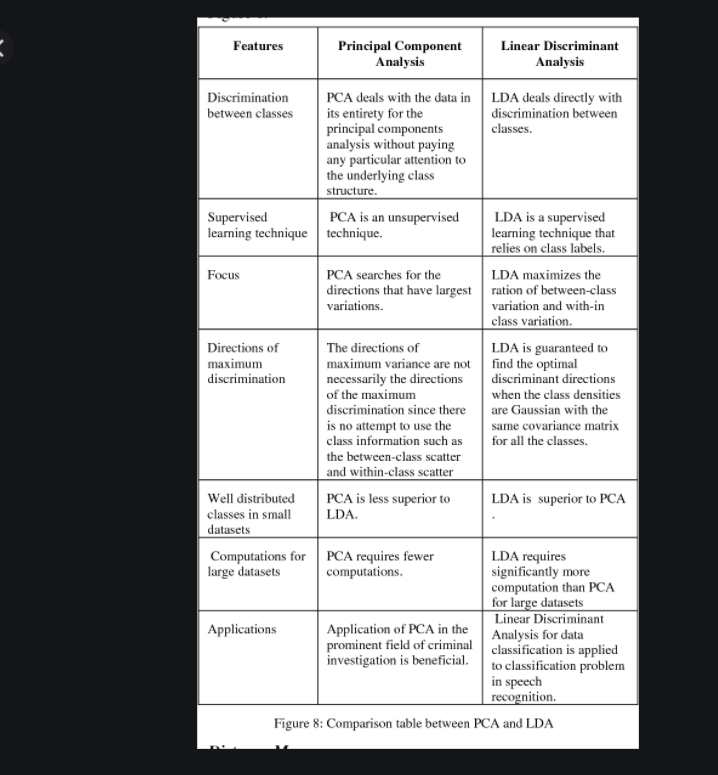)











#**IMAGE COMPRESSION USING PCA**

**Using PCA for image compression**

An image can be treated as a matrix - a grid of pixels, with values being the pixel intensities.

The basic steps we'll follow:

1. Apply PCA on the image matrix to reduce the dimensionality to a smaller number of principal components (PCs). 

2. This is lossy compression, as we are discarding some of the information.

3. To assess how much visual information we retained, we'll reconstruct the image from the limited number of PC.

4. We'll see how good the reconstructed images are for different number of selecte components.

#**PYTHON CODE**

In [7]:
#IMPORTING LIBRARIES
import os
import cv2 
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt 
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

#**1. Read a RGB Image and Plot the Image**

(177, 284, 3)


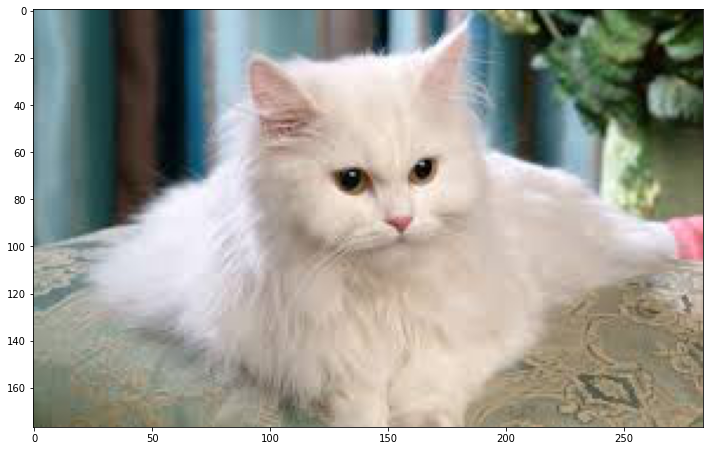

In [8]:
image_raw = imread("/cat.jpg")
print(image_raw.shape)

# Displaying the image
plt.figure(figsize=[12,8])
plt.imshow(image_raw)

#**2. Converting to greyscale**

1. Summing RGBs channel values for each pixel
2. Capping values to 1

We'll plot the matrix as a greyscale image.

(177, 284)
1.0


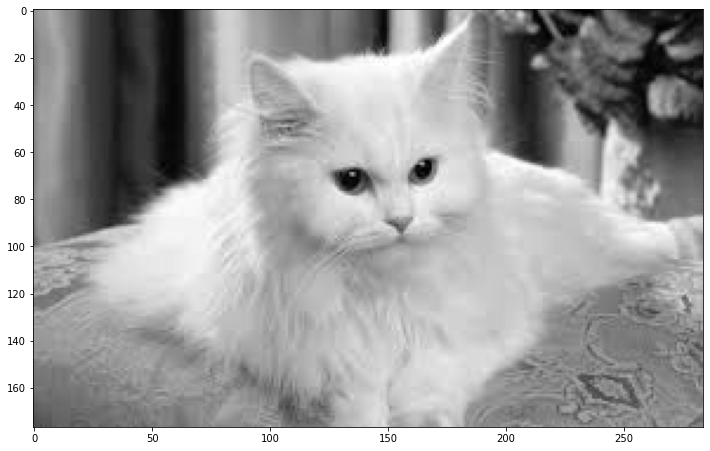

In [9]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())

plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

#**3. Performing PCA on the image**

1. We'll perform PCA on the matrix with all the components.

2. We'll then look at the scree-plot to assess how many components we could retain and how much cumulative variance they capture.

3. We'll pick a suitable number of components to represent the image for compression.

Number of components explaining 95% variance: 11


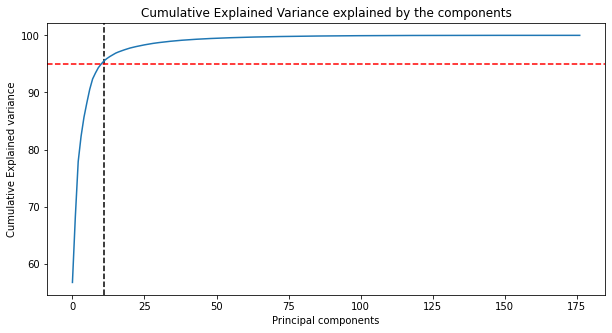

In [10]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

Looks like 6 components, instead of 1800 pixels, can explain 95% of the variance in the image!

Let's reconstruct the image using only 6 components and see if the reconstructed image is visually very different from the original.

Reconstructing the b/w image with the limited number of components (6)

First, we'll use the fit_transform method from the IncrementalPCA module to first find the 6 PCs and transform and represent the data in those 6 new components/columns.

Next, we'll reconstruct the original matrix from these 6 components using the inverse_transform method.

We'll then plot the image to visually assess the quality of it.

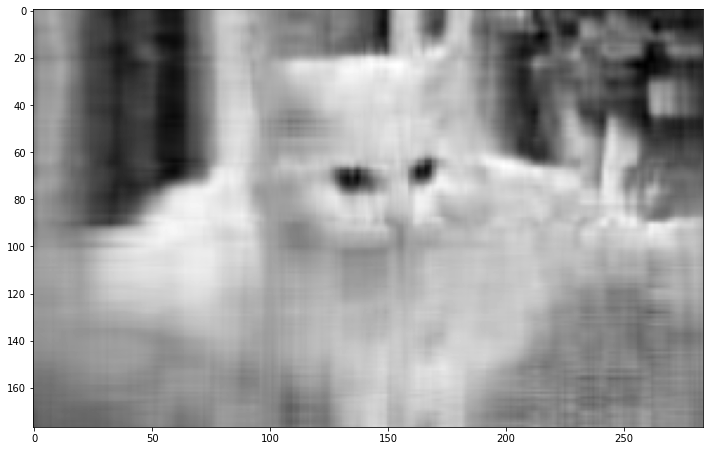

In [11]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

**Let's try out a different value of k - 150 components**

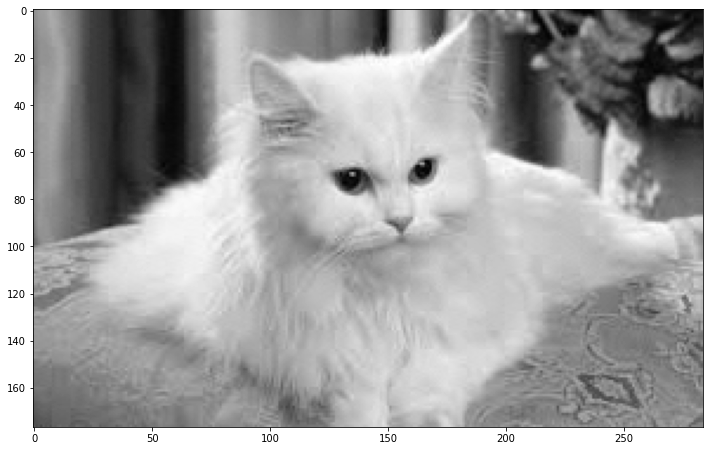

In [12]:
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon,cmap = plt.cm.gray)
    

k = 150
plt.figure(figsize=[12,8])
plot_at_k(100)

**Reconstructing and plotting for different number of components**

We'll try out different number of components, begining from 5, ending at 250

We'll reconstruct the image at each k and plot the images

ValueError: ignored

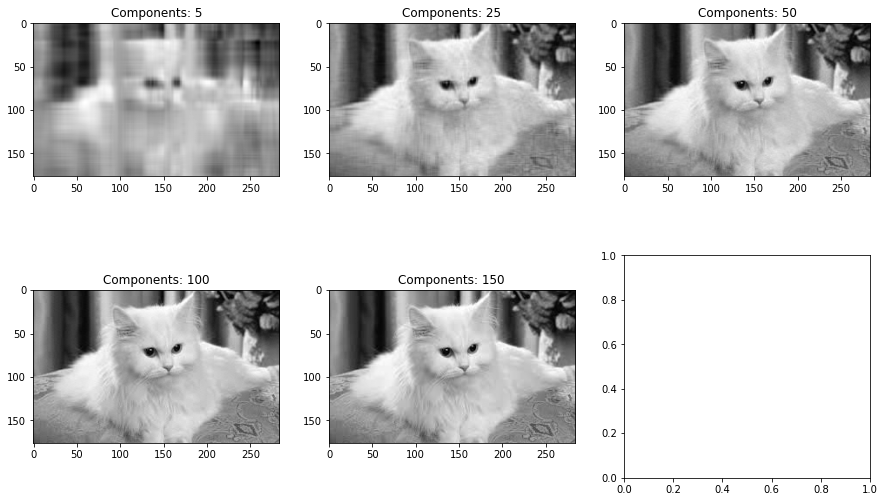

In [13]:
ks = [5, 25, 50, 100, 150, 250]

plt.figure(figsize=[15,9])

for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()

# **CONCLUSION**

We successfully implemented,

1. Implement PCA in python.

2. Choose the number of components using a scree plot

3. Reconstruct the original data from the components